In [32]:
#Importing all the required libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.datasets import cifar10
from matplotlib import pyplot as plt
import numpy as np
from keras import layers
import tensorflow as tf
from tensorflow import keras



The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:
airplane										
automobile										
bird										
cat										
deer										
dog										
frog										
horse										
ship										
truck										


In [33]:
#Loading the data for train and test
(X_train, y_train), (X_test,y_test) = cifar10.load_data()

In [34]:
print("print size of train data {}".format(X_train.shape))
print("print size of test data {}".format(X_test.shape))


print size of train data (50000, 32, 32, 3)
print size of test data (10000, 32, 32, 3)


We have 50K train images and 10k test images.Each image is fairly small of 32*32. Being RGB has 3 dimensions

In [35]:
print("print size of train class {}".format(y_train.shape))
print("print size of train class {}".format(y_test.shape))

print size of train class (50000, 1)
print size of train class (10000, 1)


We need to defined the class name here for all 10 class.we need to mention number ofclass that are present in the data set so we know how maany neurons to compress the final layer

In [36]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

num_class = len(np.unique(y_train))
print(num_class)

10


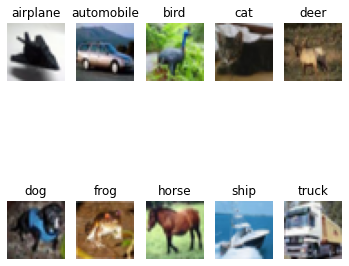

In [37]:
#ploting the first image of all the 10 classes from train data
plt.figure(figsize=(6,6))
for i in range(num_class):
  ax =plt.subplot(2, 5, i + 1)
  idx = np.where(y_train[:]==i)[0]
  futures_idx = X_train[idx,::]
  plt.imshow(futures_idx[0])
  ax.set_title(classes[i])
  plt.axis('off')

Images are too small so they are displaying in disorted way

In most of the cases we need to preprocessing the data since we are using packged data set we need to do little preprocessing by normalizing the input data

If the values of the input data are in too wide a range it can negatively impact how the network performs.In this case the input values are the pixels in the image which have value between 0 to 255

so inorder to normilize the data we need to divide the image values by 255.To do this we need to make data float type by changing the data type from integer to float data type.

In [38]:
# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [39]:
#By using numpy command to_categorical() is used to one-hot encode.
#One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

Create the model

The model consists of the convolution blocks with a max pool layer and BatchNormalization layer in each of them

In the first stage our model will learn 16 convolution filters each of which with a 3 X 3 size.Activation is relu which is simple way of non linearity.ReLU stands for Rectified Linear Unit. The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time.
This means that the neurons will only be deactivated if the output of the linear transformation is less than 0.For the negative input values, the result is zero, that means the neuron does not get activated. Since only a certain number of neurons are activated, the ReLU function is far more computationally efficient when compared to the sigmoid and tanh function

In the next stage in the deep pipeline our model will have a dropout at 20% and then flatten the layers.The final stage in the deep pipeline is a dense network with 256 units and relu activation followed by another dense layer with softmax activation layer with 10 classes as output,one for each category.

In [40]:
activation_fun = 'relu'
model = Sequential([
  
  layers.Conv2D(16, (3,3),input_shape=X_train.shape[1:], padding='same', activation=activation_fun),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(32, 3, padding='same',activation=activation_fun),
   layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(64, 3, padding='same',activation=activation_fun),
   layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(128, 3, padding='same',activation=activation_fun),
   layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(256, 3, padding='same',activation=activation_fun),
   layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation=activation_fun),
  layers.Dense(num_class,activation='softmax')
])

Compile the model

choose the optimizer as Adam optimizer and losses as Categorical_crossentropy loss function because we have not encoding for categorical value y_test and y_train

To view the training and validation accuracy for each training epoch,pass the metrics argument.

In [41]:
#Compiling the model
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
#Printing the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_14 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_15 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                      

In [43]:
seed = 21
np.random.seed(seed)
epochs = 20
batch_size = 32
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/20
1563/1563 [==============================] - 150s 95ms/step - loss: 1.3455 - accuracy: 0.5187 - val_loss: 1.2125 - val_accuracy: 0.5830
Epoch 2/20
1563/1563 [==============================] - 143s 92ms/step - loss: 0.9548 - accuracy: 0.6642 - val_loss: 0.9814 - val_accuracy: 0.6557
Epoch 3/20
1563/1563 [==============================] - 146s 93ms/step - loss: 0.8028 - accuracy: 0.7209 - val_loss: 0.9381 - val_accuracy: 0.6765
Epoch 4/20
1563/1563 [==============================] - 162s 104ms/step - loss: 0.6879 - accuracy: 0.7591 - val_loss: 0.8428 - val_accuracy: 0.7114
Epoch 5/20
1563/1563 [==============================] - 160s 102ms/step - loss: 0.6050 - accuracy: 0.7891 - val_loss: 0.8299 - val_accuracy: 0.7195
Epoch 6/20
1563/1563 [==============================] - 146s 93ms/step - loss: 0.5271 - accuracy: 0.8151 - val_loss: 0.8986 - val_accuracy: 0.7110
Epoch 7/20
1563/1563 [==============================] - 148s 95ms/step - loss: 0.4626 - accuracy: 0.8383 - val_loss:

In [44]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 6s 20ms/step - loss: 1.1331 - accuracy: 0.7424


[1.1331325769424438, 0.7423999905586243]

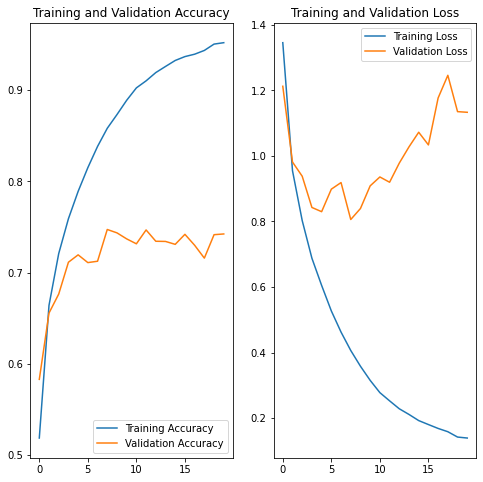

In [45]:
# Visualizing the results by using plot
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss= history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

This image most likely belongs to horse with a 23.20 percent confidence.
This image most likely belongs to horse with a 23.20 percent confidence.
This image most likely belongs to airplane with a 23.20 percent confidence.
This image most likely belongs to airplane with a 23.20 percent confidence.
This image most likely belongs to truck with a 23.20 percent confidence.


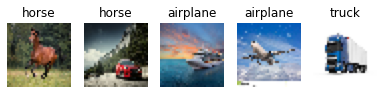

In [46]:
#Finally we are validating our model by taking 5 new images (that are not present in the data set and are not used in training or testing taken form internet
url_dict.clear()
url_dict = {'horse' : 'https://t3.ftcdn.net/jpg/03/26/50/04/240_F_326500445_ZD1zFSz2cMT1qOOjDy7C5xCD4shawQfM.jpg',
              'car' : 'https://t3.ftcdn.net/jpg/01/23/52/24/240_F_123522493_qV0XZfz5gH3zeWFq1YiNCwpDT8HPfvZL.jpg',
              'ship' : 'https://t4.ftcdn.net/jpg/01/71/45/49/240_F_171454970_ESzMFnymIcJOHjTL8iTUHhCkMZYLQoDV.jpg',
            'plane' : 'https://thumbs.dreamstime.com/z/plane-16674524.jpg',
             'truck' : 'https://t4.ftcdn.net/jpg/02/93/58/93/240_F_293589357_RC7kvZNbQKfbWvqoKg8yBTdbomaa8jNQ.jpg'    
            }
i = 0
plt.figure(figsize=(8, 8))
for key, value in url_dict.items():
  url = value
  i +=1

  path = tf.keras.utils.get_file(key, origin=url) 

  img = keras.preprocessing.image.load_img(
      path, target_size=(32, 32))
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  
  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes[np.argmax(score)], 100 * np.max(score)))
  ax =plt.subplot(1, 6, i+1)
  plt.imshow(img)
  ax.set_title(classes[np.argmax(score)])
  plt.axis('off')



  
